In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
metro_parks=gpd.read_file('../data/metro_parks.geojson')
metro_parks.head()


,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ..."
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ..."
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...","MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ..."
3,809.59,Bells Bend Park,2007,Bells Bend,PARK,4187 Old Hickory Blvd,-86.92646294,36.15016925,"Located in western Davidson County, this park ...","MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ..."
4,2168.792,Alvin G. Beaman Park,1996,Beaman,PARK,5911 Old Hickory Blvd.,-86.91984207,36.26075833,Beaman Park provides education and awareness p...,"MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ..."


In [24]:
bike_racks=gpd.read_file('../data/bike_racks.geojson')
bike_racks.head()
bike_racks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   detail_loc  430 non-null    object  
 1   quantity    430 non-null    object  
 2   location    430 non-null    object  
 3   domain      430 non-null    object  
 4   idnumber    430 non-null    object  
 5   objectid    430 non-null    object  
 6   status      430 non-null    object  
 7   lon         426 non-null    object  
 8   type        430 non-null    object  
 9   data_colle  430 non-null    object  
 10  lat         426 non-null    object  
 11  capacity    430 non-null    object  
 12  geometry    430 non-null    geometry
dtypes: geometry(1), object(12)
memory usage: 43.8+ KB


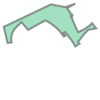

In [4]:
metro_parks.loc[0, 'geometry']


In [5]:
mp=metro_parks
br=bike_racks

<Axes: >

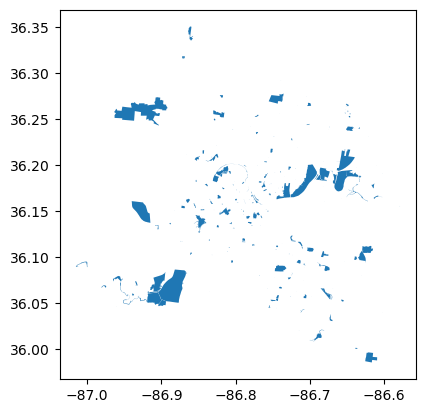

In [6]:
mp.plot()

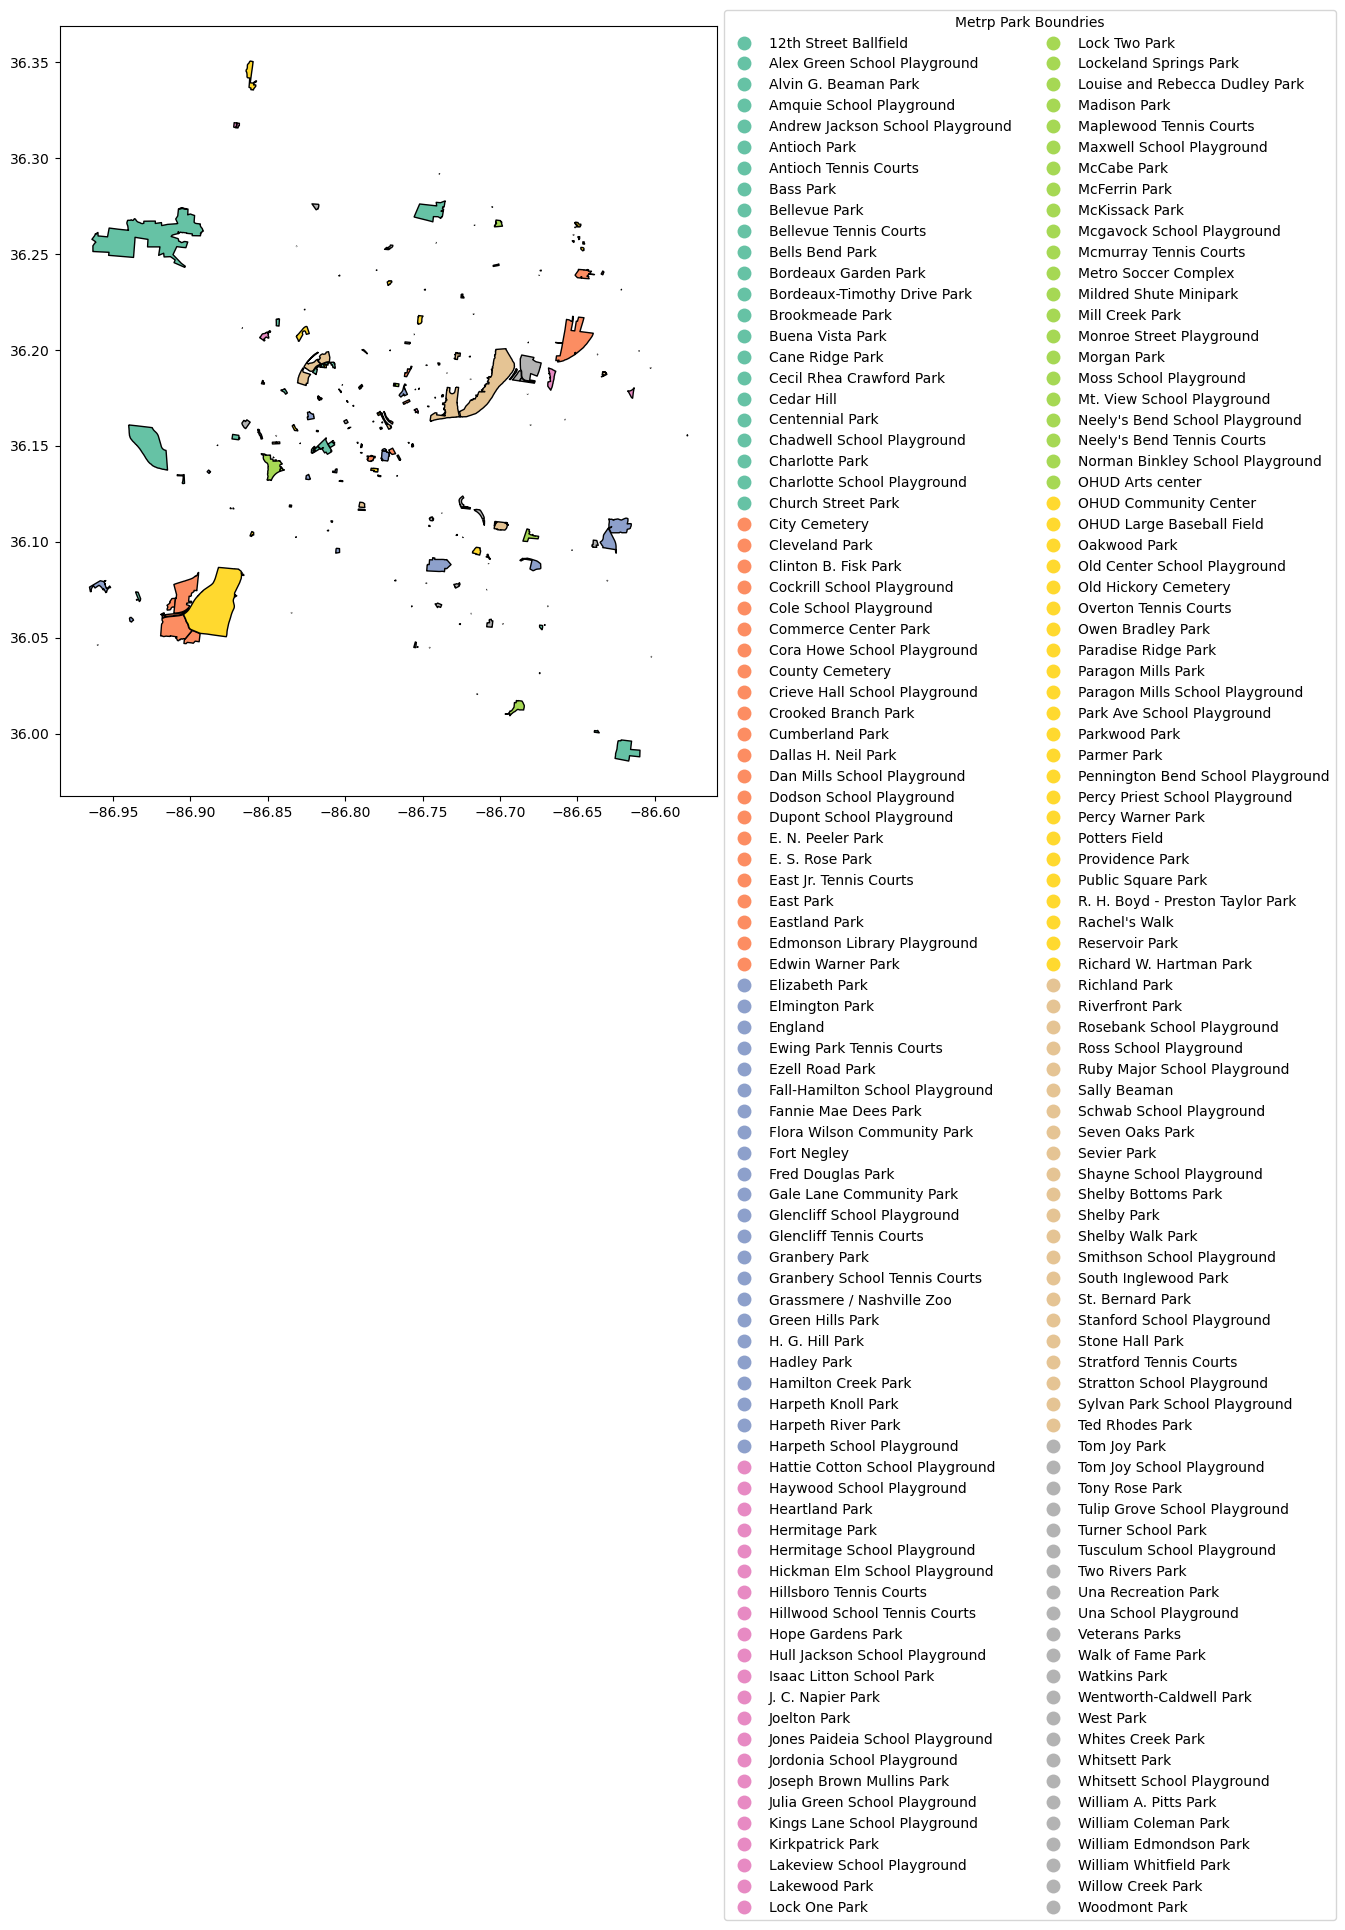

In [7]:
leg_kwds = {'title': 'Metrp Park Boundries', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

mp.plot(column = 'name', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [8]:
mp=mp[['name','year_estab','address','geometry']]

In [9]:
racks_by_zip=gpd.sjoin(br,mp,predicate='within')
racks_by_zip.head()
racks_by_zip.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 124 entries, 1 to 413
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   detail_loc   124 non-null    object  
 1   quantity     124 non-null    object  
 2   location     124 non-null    object  
 3   domain       124 non-null    object  
 4   idnumber     124 non-null    object  
 5   objectid     124 non-null    object  
 6   status       124 non-null    object  
 7   lon          124 non-null    object  
 8   type         124 non-null    object  
 9   data_colle   124 non-null    object  
 10  lat          124 non-null    object  
 11  capacity     124 non-null    object  
 12  geometry     124 non-null    geometry
 13  index_right  124 non-null    int64   
 14  name         121 non-null    object  
 15  year_estab   124 non-null    object  
 16  address      124 non-null    object  
dtypes: geometry(1), int64(1), object(15)
memory usage: 17.4+ KB


In [12]:
racks_by_zip['name'].value_counts()

name
McCabe Park           7
Buena Vista Park      5
Riverfront Park       5
Public Square Park    5
Hadley Park           4
                     ..
Elmington Park        1
Fort Negley           1
Seven Oaks Park       1
Paragon Mills Park    1
Cumberland Park       1
Name: count, Length: 63, dtype: int64

In [13]:
racks_in_mccabe=racks_by_zip.loc[racks_by_zip['name'] == 'McCabe Park']
mccabe=mp.loc[mp['name'] == 'McCabe Park']
racks_in_mccabe.head()


,detail_loc,quantity,location,domain,idnumber,objectid,status,lon,type,data_colle,lat,capacity,geometry,index_right,name,year_estab,address
67,"McCabe Golf Course, Richland Creek Greenway",1,Park/Greenway,Public,135,68,Existing,-86.8517006835,Rack,Health Dept,36.1451330432,2,POINT (-86.85170 36.14513),23,McCabe Park,1938,4601 Murphy Rd
68,Richland Creek Greenway,3,Park/Greenway,Public,136,69,Existing,-86.8494062452,Rack,Health Dept,36.144674706,6,POINT (-86.84941 36.14467),23,McCabe Park,1938,4601 Murphy Rd
69,McCabe Golf Course/Richland Creek Greenway,1,Park/Greenway,Public,137,70,Existing,-86.8483111116,Rack,Health Dept,36.1434500001,2,POINT (-86.84831 36.14345),23,McCabe Park,1938,4601 Murphy Rd
70,"McCabe Golf Course, Richland Creek Greenway",1,Park/Greenway,Public,138,71,Existing,-86.8459590365,Rack,Health Dept,36.1417969234,2,POINT (-86.84596 36.14180),23,McCabe Park,1938,4601 Murphy Rd
71,"McCabe Golf Course, Richland Creek Greenway",1,Park/Greenway,Public,139,72,Existing,-86.8446201493,Rack,Health Dept,36.1419941435,2,POINT (-86.84462 36.14199),23,McCabe Park,1938,4601 Murphy Rd


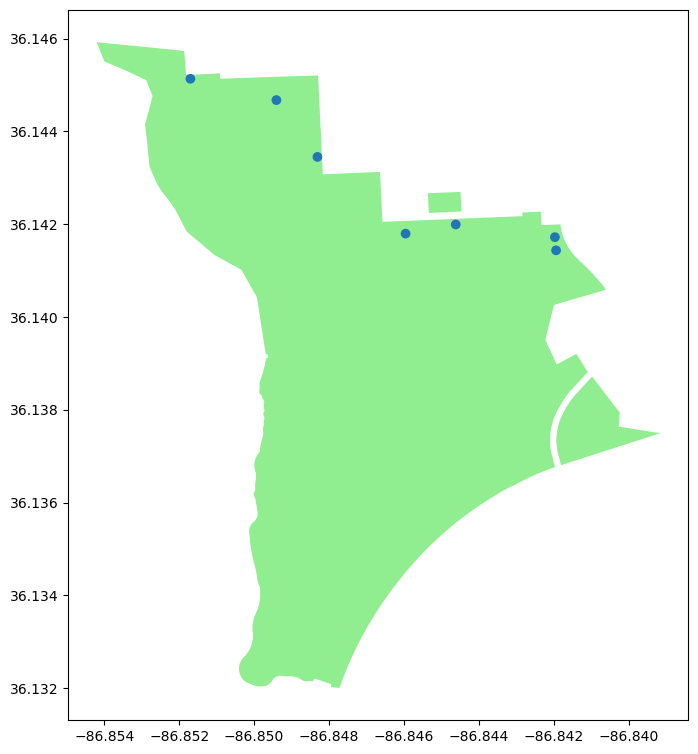

In [14]:
#fig, ax = matplotlib.subplots()
ax = mccabe.plot(figsize = (8, 10), color = 'lightgreen')
racks_in_mccabe.plot( ax = ax, column = 'address');
plt.show();

In [15]:
mccabe.geometry.centroid

C:\Users\emmal\AppData\Local\Temp\ipykernel_2164\2793128436.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mccabe.geometry.centroid


23    POINT (-86.84705 36.13922)
dtype: geometry

In [16]:
center=mccabe.geometry.centroid[23]
print(center)

POINT (-86.84704746298162 36.13921612237699)


C:\Users\emmal\AppData\Local\Temp\ipykernel_2164\375179025.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center=mccabe.geometry.centroid[23]


In [17]:
area_center=[center.y,center.x]
print(area_center)

[36.13921612237699, -86.84704746298162]


In [23]:
map_mccabe=folium.Map(location = area_center, zoom_start = 15)
map_mccabe

In [18]:
i = 0
for row_index, row_values in racks_in_mccabe.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 67
values are:
 
detail_loc      McCabe Golf Course, Richland Creek Greenway
quantity                                                  1
location                                      Park/Greenway
domain                                               Public
idnumber                                                135
objectid                                                 68
status                                             Existing
lon                                          -86.8517006835
type                                                   Rack
data_colle                                      Health Dept
lat                                           36.1451330432
capacity                                                  2
geometry       POINT (-86.85170068351864 36.14513304315514)
index_right                                              23
name                                            McCabe Park
year_estab                                             1938
address       

In [19]:
racks_by_zip.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 124 entries, 1 to 413
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   detail_loc   124 non-null    object  
 1   quantity     124 non-null    object  
 2   location     124 non-null    object  
 3   domain       124 non-null    object  
 4   idnumber     124 non-null    object  
 5   objectid     124 non-null    object  
 6   status       124 non-null    object  
 7   lon          124 non-null    object  
 8   type         124 non-null    object  
 9   data_colle   124 non-null    object  
 10  lat          124 non-null    object  
 11  capacity     124 non-null    object  
 12  geometry     124 non-null    geometry
 13  index_right  124 non-null    int64   
 14  name         121 non-null    object  
 15  year_estab   124 non-null    object  
 16  address      124 non-null    object  
dtypes: geometry(1), int64(1), object(15)
memory usage: 17.4+ KB


In [21]:
map_mccabe=folium.Map(location = area_center, zoom_start = 15)

folium.GeoJson(mccabe).add_to(map_mccabe)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in racks_in_mccabe.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['detail_loc'])
    icon=folium.Icon(color="purple",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_mccabe)
map_mccabe.save('../maps/mapmccabe.html')

#display our map
map_mccabe